# Must Data Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



from keras.layers.recurrent import LSTM,SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Data initialization and Data Descriptions

In [3]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('musk_csv.csv')

#### Print top 5 values of dataframe df 

In [4]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,-44,98,-33,-314,-282,-335,-144,-13,-197,-2,-144,-13,-11,-131,108,-43,42,-151,-4,8,-102,51,-15,108,-135,59,-166,20,-20,23,-48,-68,-299,-256,-97,-183,-24,-271,-229,-177,-6,0,-129,112,15,36,-66,-54,-75,132,-188,119,-120,-312,23,-55,-53,-26,-71,41,-55,148,-247,-306,-308,-230,-166,-35,-205,-280,-239,-53,-10,-23,25,-5,163,61,59,-39,92,72,113,-107,80,25,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,-153,113,-166,-318,-241,-329,-97,-69,-108,-179,-71,-27,-12,-133,107,-96,92,-140,48,26,-62,2,13,58,-12,59,-166,-85,-131,-57,-156,-121,-285,-189,-255,-181,2,-284,-103,-186,-18,15,-31,127,-5,24,-82,-168,10,79,-200,82,14,-101,28,-52,-43,31,-156,79,-158,137,-281,-305,-294,-262,-165,-117,-244,-246,-231,3,-2,-3,15,49,99,37,84,22,66,131,109,-77,-10,-17,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,-172,93,-42,-317,-242,-331,-98,-71,-106,-128,-71,-26,-12,-131,147,-93,93,-139,40,51,-28,-179,34,30,-21,56,-166,-85,-67,-57,-157,-133,-263,-190,-231,-182,1,-286,-103,-184,-19,14,-31,55,19,24,-88,-165,14,68,-202,47,-10,-85,19,40,-10,32,-156,79,-193,122,-271,-305,-296,-265,-168,-119,-244,-247,-230,3,-2,-3,-23,12,128,38,85,24,61,122,74,-36,-129,19,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,12,57,-12,59,-166,-84,-131,-56,-156,-122,-286,-191,-255,-181,1,-284,-104,-185,-19,14,-31,128,-5,24,-82,-168,9,78,-200,82,13,-101,28,-50,-44,31,-156,80,-158,137,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,12,57,-12,59,-166,-84,-131,-56,-156,-122,-286,-191,-255,-181,1,-284,-104,-185,-19,14,-31,128,-5,24,-82,-168,9,78,-200,82,13,-101,28,-50,-44,31,-156,80,-158,137,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,1

#### Rows and columns 

In [5]:
df.shape

(6598, 170)

#### Data information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


#### Data description (mean,min,max std. etc) 

In [7]:

df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,12.700667,-94.105335,24.210821,-45.615186,-121.602758,-125.547439,-170.321461,-95.759018,-87.315399,-24.237951,-54.001819,-91.248863,-67.800697,-55.654744,7.128221,80.092452,-62.756896,5.114580,-112.445893,26.498030,-36.375417,-23.988027,-54.988481,1.634435,-17.274022,-61.321916,79.316763,-155.735677,-16.943619,-13.007730,-6.271749,-84.647772,-82.482722,-99.559867,-104.820855,-72.398151,-175.827372,-83.528190,-92.815247,-73.518036,-3.541982,-70.569567,-34.470294,-74.743407,67.787208,-44.386935,-41.463474,-62.579418,-100.544559,2.058199,30.591846,-111.898151,85.028342,-39.855865,-118.955744,-6.052440,82.377690,-50.006517,-32.127008,-92.595938,13.029100,-106.344195,110.281600,-102.374204,-120.374659,-135.487572,-103.31070,-133.560473,-108.788724,-78.686875,-130.175053,-84.534101,-60.493786,-61.240

#### Name of columns  in df

In [8]:
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

### Data Filter
* Removing unnecessary columns exists in df

In [9]:
df.drop(['molecule_name','conformation_name'],1,inplace=True)

* take df id  in class_id and target name 'class' as y_label

In [10]:
y_label = df['class']
class_id =df['ID'] 
df = df.drop(['class','ID'],1)

### After filtering the remaining features columns exists in dataframe df

In [11]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,-44,98,-33,-314,-282,-335,-144,-13,-197,-2,-144,-13,-11,-131,108,-43,42,-151,-4,8,-102,51,-15,108,-135,59,-166,20,-20,23,-48,-68,-299,-256,-97,-183,-24,-271,-229,-177,-6,0,-129,112,15,36,-66,-54,-75,132,-188,119,-120,-312,23,-55,-53,-26,-71,41,-55,148,-247,-306,-308,-230,-166,-35,-205,-280,-239,-53,-10,-23,25,-5,163,61,59,-39,92,72,113,-107,80,25,-27,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,-153,113,-166,-318,-241,-329,-97,-69,-108,-179,-71,-27,-12,-133,107,-96,92,-140,48,26,-62,2,13,58,-12,59,-166,-85,-131,-57,-156,-121,-285,-189,-255,-181,2,-284,-103,-186,-18,15,-31,127,-5,24,-82,-168,10,79,-200,82,14,-101,28,-52,-43,31,-156,79,-158,137,-281,-305,-294,-262,-165,-117,-244,-246,-231,3,-2,-3,15,49,99,37,84,22,66,131,109,-77,-10,-17,17,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,-172,93,-42,-317,-242,-331,-98,-71,-106,-128,-71,-26,-12,-131,147,-93,93,-139,40,51,-28,-179,34,30,-21,56,-166,-85,-67,-57,-157,-133,-263,-190,-231,-182,1,-286,-103,-184,-19,14,-31,55,19,24,-88,-165,14,68,-202,47,-10,-85,19,40,-10,32,-156,79,-193,122,-271,-305,-296,-265,-168,-119,-244,-247,-230,3,-2,-3,-23,12,128,38,85,24,61,122,74,-36,-129,19,41,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,12,57,-12,59,-166,-84,-131,-56,-156,-122,-286,-191,-255,-181,1,-284,-104,-185,-19,14,-31,128,-5,24,-82,-168,9,78,-200,82,13,-101,28,-50,-44,31,-156,80,-158,137,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,-153,113,-163,-319,-242,-329,-97,-69,-108,-180,-71,-26,-12,-133,107,-95,93,-140,47,27,-63,-1,12,57,-12,59,-166,-84,-131,-56,-156,-122,-286,-191,-255,-181,1,-284,-104,-185,-19,14,-31,128,-5,24,-82,-168,9,78,-200,82,13,-101,28,-50,-44,31,-156,80,-158,137,-282,-306,-295,-263,-166,-118,-244,-247,-231,3,-2,-3,14,50,99,37,84,23,66,131,109,-78,-12,-18,17,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66

### Information of data 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 166 entries, f1 to f166
dtypes: int64(166)
memory usage: 8.4 MB


### Data Preprocessing ( data decomposition and data normalization)  

### PCA -
* Principal component analysis is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
* PCA is a unsupervised Machine Learning algo used for Dimension Reduction technique.
* Dimensionality reduction technique are used in large no of feature columns. 
* Here i reduced our features columns(f1-f166) upto 10 i.e., n_component = 10 , so our accuracy can be improved.


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_pca = pca.fit_transform(df)

#### After Pca Decomposition we define using pandas datframe

In [14]:
x_pca = pd.DataFrame(x_pca,columns=['feat1','feat2','feat3','feat4','feat5','feat6','feat7','feat8','feat9','feat10'])
x_pca.head()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
0,99.946393,915.817180,166.686634,-27.025906,113.490271,-25.525808,-169.285548,-10.487416,-194.076310,-120.549916
1,-208.960040,828.276632,71.730178,45.220756,-31.575160,135.544563,-71.400014,-108.683681,206.435623,-71.139212
2,-250.215211,795.425387,-201.909442,36.316195,-29.151689,53.757241,-24.457520,-68.686425,191.176859,-71.462933
3,-210.105414,830.286060,68.391380,43.867281,-29.349381,132.579551,-71.074110,-108.275169,204.553610,-72.354399
4,-209.967163,830.417861,68.124843,43.773137,-29.440101,132.259114,-71.269241,-107.953518,204.281924,-72.567459


### Normalization using Min Max Scaler

* An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called "normalization" - a common cause for ambiguities). In this approach, the data is scaled to a fixed range - usually 0 to 1. The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

* A Min-Max scaling is typically done via the following equation:

            * Xsc=(X−Xmin)/(Xmax−Xmin).
* I used min-max because our features values increases or decreases with very large values

In [15]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_norm = min_max.fit_transform(x_pca)
X_norm = pd.DataFrame(X_norm,columns=['feat1','feat2','feat3','feat4','feat5','feat6','feat7','feat8','feat9','feat10'])

In [16]:
X_norm.head()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
0,0.525877,0.954880,0.569265,0.403049,0.298543,0.450047,0.329904,0.364530,0.288046,0.369849
1,0.392430,0.904645,0.491266,0.460103,0.229716,0.566649,0.416762,0.271723,0.670745,0.421005
2,0.374608,0.885794,0.266493,0.453071,0.230866,0.507441,0.458416,0.309525,0.656164,0.420670
3,0.391935,0.905799,0.488523,0.459034,0.230772,0.564503,0.417051,0.272109,0.668946,0.419747
4,0.391995,0.905874,0.488304,0.458960,0.230729,0.564271,0.416878,0.272413,0.668687,0.419527


## Data Visualization

### Scattering of features columns

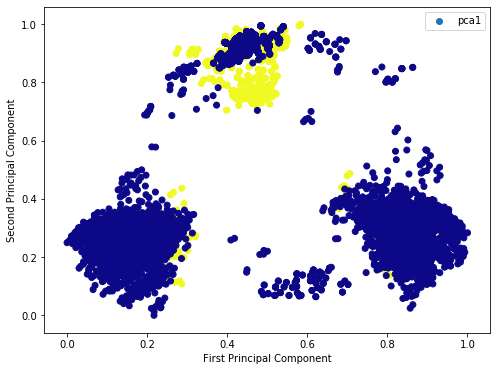

In [17]:
# giving a larger plot 
plt.figure(figsize =(8, 6)) 
  
plt.scatter( X_norm['feat1'],X_norm['feat2'], c = y_label, cmap ='plasma') 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')
plt.legend(['pca1','pca2'])

### Count the no of Target columns musk or non musk 

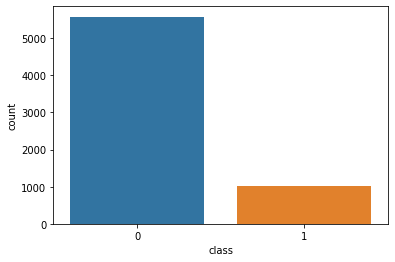

In [18]:
sns.countplot(y_label)

* non musk data(0) > musk data(1)

### Histogram Chart

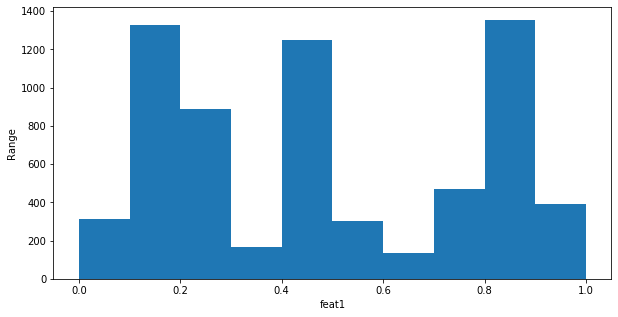

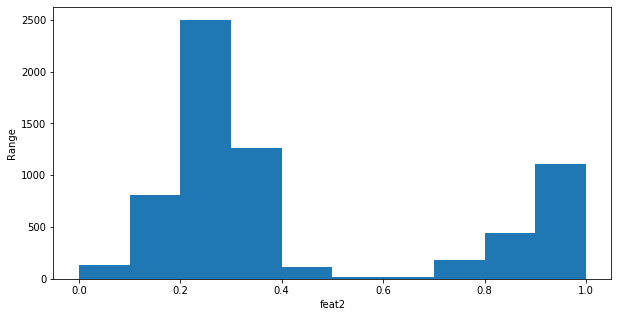

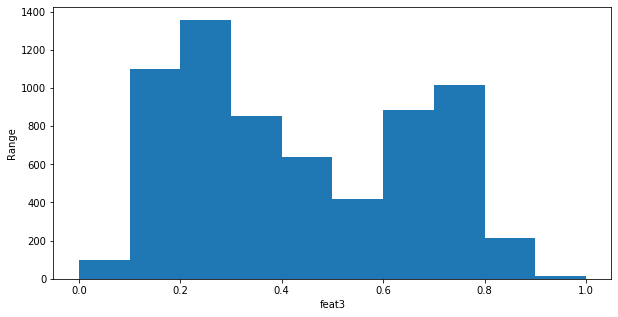

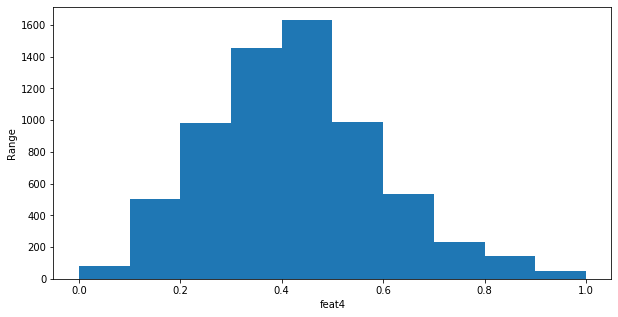

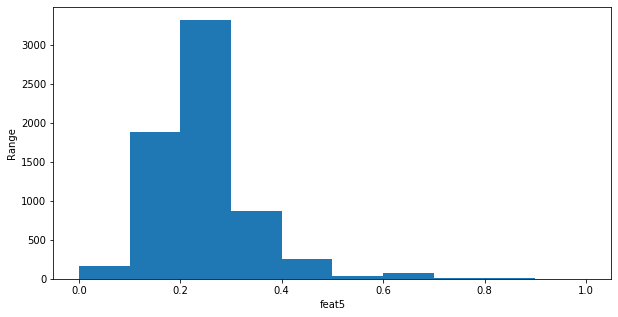

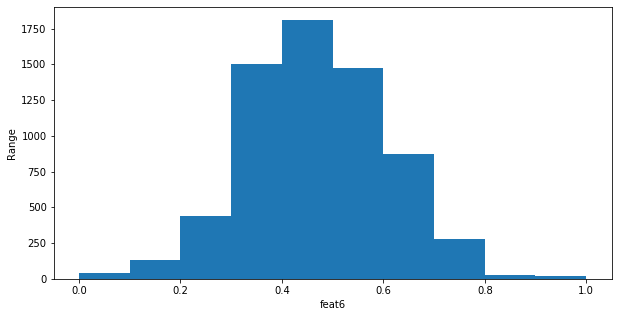

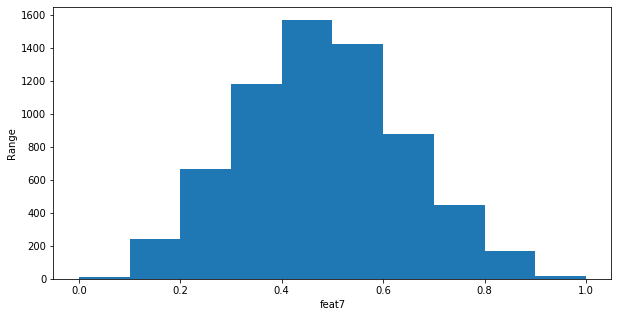

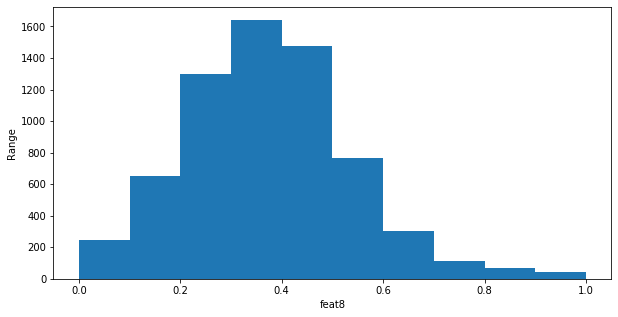

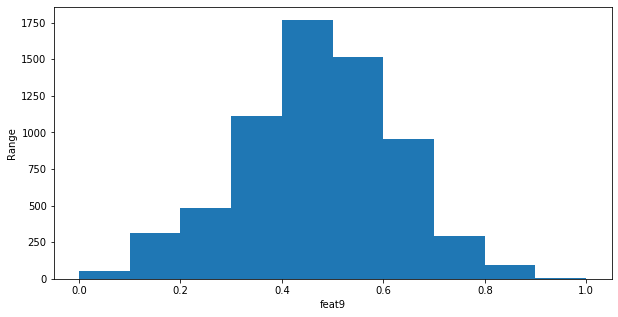

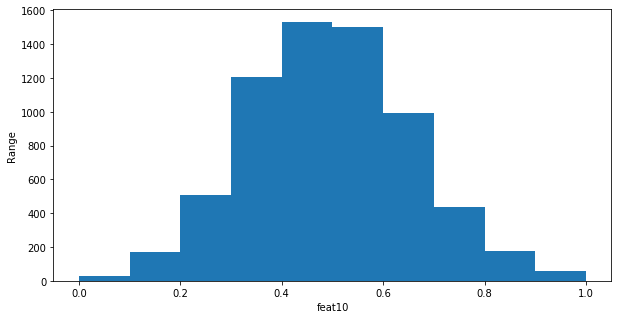

In [19]:
for i in X_norm.columns:
   
    plt.figure(figsize=[10,5])
    plt.hist(X_norm[i])
    plt.xlabel(i)
    plt.ylabel('Range')

* Frequency lies between 0.0 to 1.0 in feature columns 1 to 10
* Range in feat cols 1 = 1400
* Range in feat cols 2 = 2500
* Range in feat cols 3 = 1400
* Range in feat cols 4 = 1600
* Range in feat cols 5 = 3000
* Range in feat cols 6 = 1750
* Range in feat cols 7 = 1600
* Range in feat cols 8 = 1600
* Range in feat cols 9 = 1750
* Range in feat cols 10 = 1600


### Correlation 

* negative correlation
* positive correlation 
* no correlation 

In [20]:
X_norm.corr()

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
feat1,1.000000e+00,1.038018e-17,-3.139135e-17,2.919867e-17,-7.885614e-17,-3.169446e-17,-7.269537e-16,-6.398990e-17,-2.646886e-17,2.209812e-17
feat2,1.038018e-17,1.000000e+00,-5.614341e-17,9.725765e-17,-4.823724e-17,1.200633e-16,-6.948533e-17,-4.120189e-17,1.035913e-16,5.776241e-17
feat3,-3.139135e-17,-5.614341e-17,1.000000e+00,8.712192e-17,-3.787810e-18,-6.531801e-17,6.380182e-17,-5.339472e-17,3.444845e-17,2.687424e-17
feat4,2.919867e-17,9.725765e-17,8.712192e-17,1.000000e+00,-1.549949e-15,1.134029e-15,-3.944087e-17,4.418377e-17,7.589206e-17,-2.075578e-16
feat5,-7.885614e-17,-4.823724e-17,-3.787810e-18,-1.549949e-15,1.000000e+00,-7.206402e-16,3.923085e-17,-9.101144e-17,1.744615e-16,5.120731e-16
feat6,-3.169446e-17,1.200633e-16,-6.531801e-17,1.134029e-15,-7.206402e-16,1.000000e+00,-3.241054e-16,-6.739649e-17,4.981751e-16,-5.388217e-16
feat7,-7.269537e-16,-6.948533e-17,6.380182e-17,-3.944087e-17,3.923085e-17,-3.241054e-16,1.000000e+00,-3.597528e-17,-5.718699e-16,-3.704734e-16
feat8,-6.398990e-17,-4.120189e-17,-5.339472e-17,4.418377e-17,-9.101144e-17,-6.739649e-17,-3.597528e-17,1.000000e+00,-4.907840e-16,-8.030226e-17
feat9,-2.646886e-17,1.035913e-16,3.444845e-17,7.589206e-17,1.744615e-16,4.981751e-16,-5.718699e-16,-4.907840e-16,1.000000e+00,-1.844451e-16
feat10,2.209812e-17,5.776241e-17,2.687424e-17,-2.075578e-16,5.120731e-16,-5.388217e-16,-3.704734e-16,-8.030226e-17,-1.844451e-16,1.000000e+00


#### Correlation diagram using seaborn.heatmap()
* annot = true (print correation value)

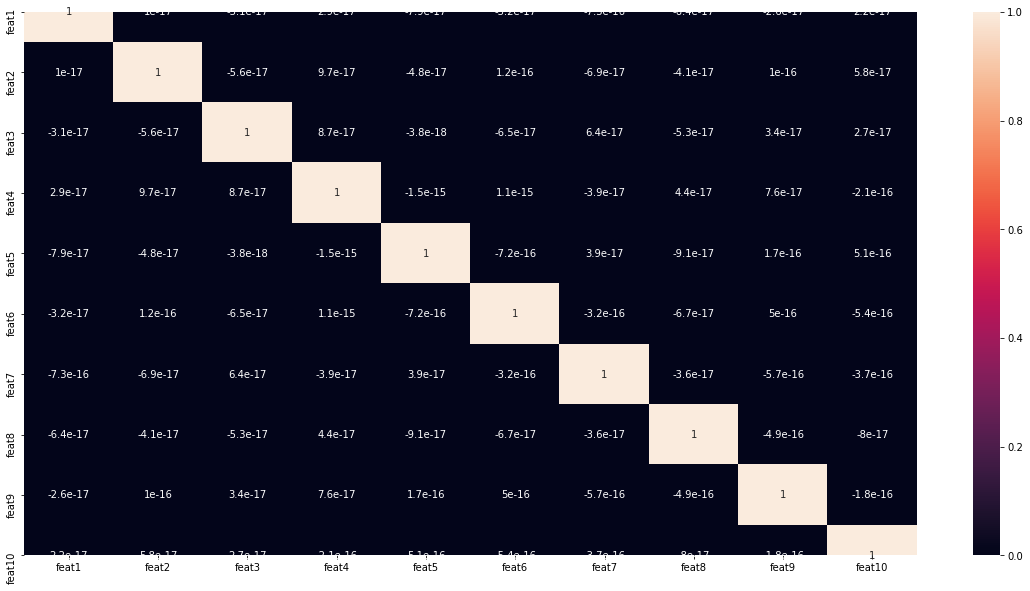

In [21]:
plt.figure(figsize=[20,10])
sns.heatmap(X_norm.corr(),annot=True)

### Find Outlier in the data

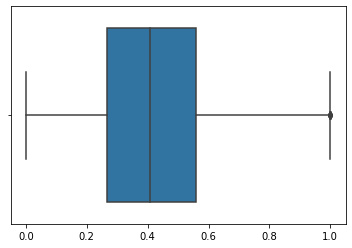

In [22]:
sns.boxplot(X_norm)

* no outlier exists in the data our data are clean now label the data

### Labelling the data
* X_label - contain features columns i.e feat1 and feat2
* y_label - contain target values

In [23]:
X = X_norm
y = y_label

### Split data into Training and Testing 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

### Machine Learning Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Training and testing score

In [26]:
rfc.score(X_train,y_train)

0.9954528230390299

In [27]:
rfc.score(X_test,y_test)

0.9462121212121212

### Training our model using Other  Classifier
* Fitting Machine learning  algo and compare there training and testing score
* To check Data underfitting or Overfitting the model by comparing there score.
     * In underfitting condition- model accuracy is very low.
     * In Overfitting condtion- training  accuracy is high but testing accuracy is exponentially low as compare to training. 
* Chose the best algo suited for our model
* Find Accuracy score , confusion matrix, classsification report

In [28]:
lr = LogisticRegression()
rfc =RandomForestClassifier(n_estimators=10,max_depth=10)
lsvc = LinearSVC()
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=6)

* append all classifier in one list using list.append() append

In [29]:
ml_model = []
ml_model.append(("LogisticRegression",lr))
ml_model.append(('RandomForestClassifier',rfc))
ml_model.append(('LinearSVC',lsvc))
ml_model.append(('GaussianNB',gnb))
ml_model.append(('KNN',knn))

* algo name and algo pass one by one and print the score of training and testing to find the best classifier

In [30]:
for name, algo in ml_model:
    algo.fit(X_train,y_train)
    train_score=algo.score(X_train,y_train)
    test_score = algo.score(X_test,y_test)
    msg = "%s = (training score): %f (testing score:) %f"%(name,train_score,test_score)
    print(msg)
    print('\n')

/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression = (training score): 0.828912 (testing score:) 0.828030


RandomForestClassifier = (training score): 0.976885 (testing score:) 0.946970


LinearSVC = (training score): 0.843312 (testing score:) 0.843939


GaussianNB = (training score): 0.846912 (testing score:) 0.848485


KNN = (training score): 0.961728 (testing score:) 0.957576




####  KNN gave accurate accuracy (i.e =96% approx ) neither underfitting nor overfitting the data

In [31]:
# Prediction
from sklearn import metrics
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [32]:
print("KNN  Classification_report:",metrics.classification_report(y_test,pred))
print("====================================================================================\n")
print("KNN Confusion Matrix:",metrics.confusion_matrix(y_test, pred))
print("====================================================================================\n")
print("Accuracy",metrics.accuracy_score(y_test,pred))

KNN  Classification_report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1118
           1       0.91      0.80      0.85       202

   micro avg       0.96      0.96      0.96      1320
   macro avg       0.94      0.89      0.91      1320
weighted avg       0.96      0.96      0.96      1320


KNN Confusion Matrix: [[1103   15]
 [  41  161]]

Accuracy 0.9575757575757575


## Deep Learning using ANN (model)

![](https://groupfuturista.com/blog/wp-content/uploads/2019/03/Artificial-Neural-Networks-Man-vs-Machine.jpeg)

In [33]:
# Check the shape of training data
X_train.shape

(5278, 10)

### ANN define by keras using Sequential() method adding no of layers in it
* Dense layer - define by dnn ,using activation function exponential linear unit (elu) and softmax with shape define columns features=10.
   * Exponential Linear Unit.

        * It follows: f(x) =  alpha * (exp(x) - 1.) for x < 0, f(x) = x for x >= 0.

        * Input shape
   * Softmax is an activation function. Other activation functions include RELU and Sigmoid. It is frequently used in classifications. Softmax output is large if the score (input called logit) is large. Its output is small if the score is small.


In [34]:
model = Sequential()
model.add(Dense(1000,activation='elu',input_shape = (10,)))
model.add(Dense(128,activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(100,activation='softmax'))

#### Summarization of neral net.

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              11000     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               128128    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
Total params: 162,128
Trainable params: 162,128
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics =['accuracy'])

In [37]:
history = model.fit(X_train,y_train,epochs=390)

Epoch 1/390
5278/5278 [==============================] - 1s 101us/step - loss: 0.5349 - accuracy: 0.8323
Epoch 2/390
5278/5278 [==============================] - 0s 90us/step - loss: 0.3903 - accuracy: 0.8335
Epoch 3/390
5278/5278 [==============================] - 0s 89us/step - loss: 0.3662 - accuracy: 0.8391
Epoch 4/390
5278/5278 [==============================] - 0s 87us/step - loss: 0.3539 - accuracy: 0.8463
Epoch 5/390
5278/5278 [==============================] - 0s 87us/step - loss: 0.3433 - accuracy: 0.8475
Epoch 6/390
5278/5278 [==============================] - 1s 116us/step - loss: 0.3313 - accuracy: 0.8505
Epoch 7/390
5278/5278 [==============================] - 1s 99us/step - loss: 0.3326 - accuracy: 0.8515
Epoch 8/390
5278/5278 [==============================] - 1s 99us/step - loss: 0.3342 - accuracy: 0.8488
Epoch 9/390
5278/5278 [==============================] - 1s 99us/step - loss: 0.3229 - accuracy: 0.8513
Epoch 10/390
5278/5278 [==============================] - 1s 1

5278/5278 [==============================] - 0s 82us/step - loss: 0.0757 - accuracy: 0.9672
Epoch 79/390
5278/5278 [==============================] - 0s 82us/step - loss: 0.0674 - accuracy: 0.9737
Epoch 80/390
5278/5278 [==============================] - 0s 82us/step - loss: 0.0671 - accuracy: 0.9712
Epoch 81/390
5278/5278 [==============================] - 0s 83us/step - loss: 0.0712 - accuracy: 0.9691
Epoch 82/390
5278/5278 [==============================] - 0s 82us/step - loss: 0.0643 - accuracy: 0.9718
Epoch 83/390
5278/5278 [==============================] - 0s 82us/step - loss: 0.0580 - accuracy: 0.9750
Epoch 84/390
5278/5278 [==============================] - 0s 80us/step - loss: 0.0722 - accuracy: 0.9672
Epoch 85/390
5278/5278 [==============================] - 0s 82us/step - loss: 0.0828 - accuracy: 0.9663
Epoch 86/390
5278/5278 [==============================] - 0s 83us/step - loss: 0.0661 - accuracy: 0.9701
Epoch 87/390
5278/5278 [==============================] - 0s 82us/st

5278/5278 [==============================] - 1s 113us/step - loss: 0.0393 - accuracy: 0.9831
Epoch 156/390
5278/5278 [==============================] - 1s 115us/step - loss: 0.0481 - accuracy: 0.9826
Epoch 157/390
5278/5278 [==============================] - 1s 113us/step - loss: 0.0613 - accuracy: 0.9788
Epoch 158/390
5278/5278 [==============================] - 1s 111us/step - loss: 0.0613 - accuracy: 0.9757
Epoch 159/390
5278/5278 [==============================] - 1s 112us/step - loss: 0.0361 - accuracy: 0.9858
Epoch 160/390
5278/5278 [==============================] - 1s 112us/step - loss: 0.0266 - accuracy: 0.9888
Epoch 161/390
5278/5278 [==============================] - 1s 110us/step - loss: 0.0309 - accuracy: 0.9865
Epoch 162/390
5278/5278 [==============================] - 1s 115us/step - loss: 0.0504 - accuracy: 0.9816
Epoch 163/390
5278/5278 [==============================] - 1s 113us/step - loss: 0.0579 - accuracy: 0.9786
Epoch 164/390
5278/5278 [==========================

5278/5278 [==============================] - 0s 86us/step - loss: 0.0201 - accuracy: 0.9909
Epoch 233/390
5278/5278 [==============================] - 0s 87us/step - loss: 0.0470 - accuracy: 0.9824
Epoch 234/390
5278/5278 [==============================] - 0s 85us/step - loss: 0.0537 - accuracy: 0.9809
Epoch 235/390
5278/5278 [==============================] - 0s 87us/step - loss: 0.0452 - accuracy: 0.9845
Epoch 236/390
5278/5278 [==============================] - 1s 100us/step - loss: 0.0174 - accuracy: 0.9930
Epoch 237/390
5278/5278 [==============================] - 0s 88us/step - loss: 0.0196 - accuracy: 0.9920
Epoch 238/390
5278/5278 [==============================] - 0s 86us/step - loss: 0.0213 - accuracy: 0.9907
Epoch 239/390
5278/5278 [==============================] - 0s 86us/step - loss: 0.0174 - accuracy: 0.9936
Epoch 240/390
5278/5278 [==============================] - 0s 86us/step - loss: 0.0177 - accuracy: 0.9917
Epoch 241/390
5278/5278 [==============================] - 

5278/5278 [==============================] - 0s 90us/step - loss: 0.0140 - accuracy: 0.9941
Epoch 310/390
5278/5278 [==============================] - 0s 87us/step - loss: 0.0266 - accuracy: 0.9905
Epoch 311/390
5278/5278 [==============================] - 0s 90us/step - loss: 0.0195 - accuracy: 0.9920
Epoch 312/390
5278/5278 [==============================] - 0s 90us/step - loss: 0.0256 - accuracy: 0.9901
Epoch 313/390
5278/5278 [==============================] - 0s 91us/step - loss: 0.0329 - accuracy: 0.9875
Epoch 314/390
5278/5278 [==============================] - 0s 89us/step - loss: 0.0228 - accuracy: 0.9911
Epoch 315/390
5278/5278 [==============================] - 0s 89us/step - loss: 0.0107 - accuracy: 0.9953
Epoch 316/390
5278/5278 [==============================] - 0s 89us/step - loss: 0.0084 - accuracy: 0.9973
Epoch 317/390
5278/5278 [==============================] - 0s 90us/step - loss: 0.0160 - accuracy: 0.9939
Epoch 318/390
5278/5278 [==============================] - 0

5278/5278 [==============================] - 0s 94us/step - loss: 0.0765 - accuracy: 0.9807
Epoch 387/390
5278/5278 [==============================] - 0s 91us/step - loss: 0.0190 - accuracy: 0.9932
Epoch 388/390
5278/5278 [==============================] - 0s 93us/step - loss: 0.0168 - accuracy: 0.9930
Epoch 389/390
5278/5278 [==============================] - 0s 92us/step - loss: 0.0088 - accuracy: 0.9964
Epoch 390/390
5278/5278 [==============================] - 0s 92us/step - loss: 0.0079 - accuracy: 0.9970


### Visualize the training loss and training validation accuracy 
* Accuracy for training dataset =99
* Loss reduce upto =0.0079

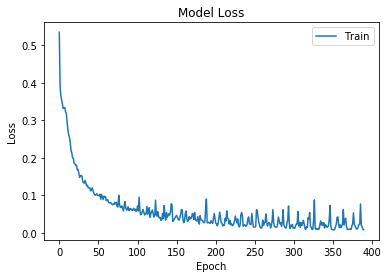

In [38]:
#Visualize the training loss and te validation loss to see if the model is overfitting
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'],loc='upper right')
plt.show()

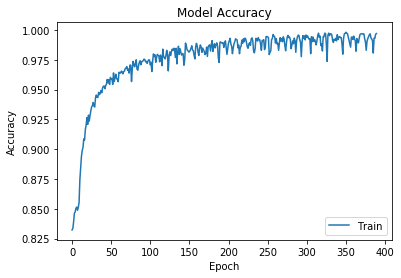

In [39]:
#Visualize the training accuracy and te validation accuracy to see if the model is overfitting
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

### Loss v/s Accuracy graph

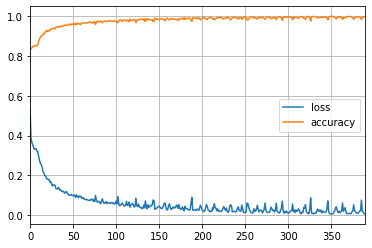

In [40]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim()
plt.show()

### Evaluate test data

In [41]:
test_acc =model.evaluate(X_test,y_test)

1320/1320 [==============================] - 0s 40us/step


In [42]:
print("Loss and Accuracy of testing data =",test_acc)

Loss and Accuracy of testing data = [0.1037063995708057, 0.9750000238418579]


* Our accuracy now for test data is 97.5 and loss reduces upto 0.1037(approx.) which is very fine hence our model will work on new data

### Prediction of testing data

In [43]:
predict = model.predict_classes(X_test)

### Represent in dataframe formate with calss id start from 5279 as training data contain 1 to 5278 

In [44]:
test_predition = pd.DataFrame({"ID":class_id[5278:],"Prediction_musk":predict})

In [45]:
test_predition.head()

,ID,Prediction_musk
5278,5279,1
5279,5280,0
5280,5281,0
5281,5282,0
5282,5283,0


In [46]:
test_predition.shape

(1320, 2)

### Confusion Matrix define-:
* True Negative
* False Positive
* False Negative
* True Positive
        * All diagonal element are correct prediction rest are incorrect 
        * Sum of all correct prediction(diagonal data) divided by sum of all the data(correct or wrong prediction data)

In [47]:
from sklearn import metrics
metrics.confusion_matrix(y_test,predict)

array([[1099,   19],
       [  14,  188]])

#### Define 
* precision-:precision is the fraction of relevant instances among the retrieved instances
* recall:-while recall is the fraction of the total amount of relevant instances that were actually retrieved
* f1-score-:F1 is an overall measure of a model’s accuracy that combines precision and recall, in that weird way that addition and multiplication just mix two ingredients to make a separate dish altogether

In [48]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1118
           1       0.91      0.93      0.92       202

   micro avg       0.97      0.97      0.97      1320
   macro avg       0.95      0.96      0.95      1320
weighted avg       0.98      0.97      0.98      1320



In [49]:
model.save('train_Dense.h5')

### Prediction submission csv data

In [50]:
test_predition.to_csv('prediction_score.csv',index=False)

## Deep Learning  using LSTM (model2)

![](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)

In [51]:
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
X = np.array(X)

### Reshaping size so our model can fit the lstm layer

In [52]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Shape after reshape

In [53]:
X_train.shape

(5278, 1, 10)

### In sequential model2 we add lstm with dense layers

In [70]:
model2 = Sequential() 
model2.add(LSTM((1), batch_input_shape=(None,1,10),return_sequences=True,init='glorot_normal', inner_init='glorot_normal', activation='elu'))
model2.add(LSTM((1), batch_input_shape=(None,1,10),return_sequences=True,init='glorot_normal', inner_init='glorot_normal', activation='elu'))   
model2.add(LSTM((1), batch_input_shape=(None,1,10),return_sequences=True,init='glorot_normal', inner_init='glorot_normal', activation='elu'))   
model2.add(LSTM((1), batch_input_shape=(None,1,10),return_sequences=True,init='glorot_normal', inner_init='glorot_normal', activation='elu'))   
model2.add(Dense(1000,activation='elu'))
model2.add(Dense(1280,activation='elu'))
model2.add(Dense(100,activation='elu'))
model2.add(Dense(1000,activation='softmax')) 
model2.add(LSTM((1), return_sequences=False))

model2.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])

/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1, batch_input_shape=(None, 1, ..., return_sequences=True, activation="elu", kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal")`
  
/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1, batch_input_shape=(None, 1, ..., return_sequences=True, activation="elu", kernel_initializer="glorot_normal", recurrent_initializer="glorot_normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(1, batch_input_shape=(None, 1, ..., return_sequences=True, activation="elu", kernel_initializer="glorot_normal", recurrent_initializ

In [71]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 1)              48        
_________________________________________________________________
lstm_21 (LSTM)               (None, 1, 1)              12        
_________________________________________________________________
lstm_22 (LSTM)               (None, 1, 1)              12        
_________________________________________________________________
lstm_23 (LSTM)               (None, 1, 1)              12        
_________________________________________________________________
dense_22 (Dense)             (None, 1, 1000)           2000      
_________________________________________________________________
dense_23 (Dense)             (None, 1, 1280)           1281280   
_________________________________________________________________
dense_24 (Dense)             (None, 1, 100)           

In [79]:
model2.fit(X_train, y_train, nb_epoch=10,validation_data=(X_test, y_test))
model2.save('train_LSTM10.h5');
model2.fit(X_train, y_train, nb_epoch=10,validation_data=(X_test, y_test))
model2.save('train_LSTM20.h5');
model2.fit(X_train, y_train, nb_epoch=10,validation_data=(X_test, y_test))
model2.save('train_LSTM30.h5');
history = model2.fit(X_train, y_train, nb_epoch=10,validation_data=(X_test, y_test))
model2.save('train_LSTM35.h5')

Train on 5278 samples, validate on 1320 samples
Epoch 1/1
 224/5278 [>.............................] - ETA: 3s - loss: 0.1116 - accuracy: 0.8884

/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


5278/5278 [==============================] - 4s 790us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Train on 5278 samples, validate on 1320 samples
Epoch 1/1
 192/5278 [>.............................] - ETA: 3s - loss: 0.1354 - accuracy: 0.8646

/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


5278/5278 [==============================] - 4s 807us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Train on 5278 samples, validate on 1320 samples
Epoch 1/1
 224/5278 [>.............................] - ETA: 4s - loss: 0.1875 - accuracy: 0.8125

/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


5278/5278 [==============================] - 4s 799us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Train on 5278 samples, validate on 1320 samples
Epoch 1/10
 224/5278 [>.............................] - ETA: 4s - loss: 0.1920 - accuracy: 0.8080

/home/psspl_sarfaraz/environments/my_env/lib64/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


5278/5278 [==============================] - 4s 799us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Epoch 2/10
5278/5278 [==============================] - 4s 836us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Epoch 3/10
5278/5278 [==============================] - 5s 857us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Epoch 4/10
5278/5278 [==============================] - 5s 873us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Epoch 5/10
5278/5278 [==============================] - 5s 978us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Epoch 6/10
5278/5278 [==============================] - 5s 948us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accuracy: 0.8470
Epoch 7/10
5278/5278 [==============================] - 4s 818us/step - loss: 0.1544 - accuracy: 0.8456 - val_loss: 0.1530 - val_accura

* Accuracy improve with large no of epochs

### Visualize the training loss and te validation accuracy to see if the model is overfitting


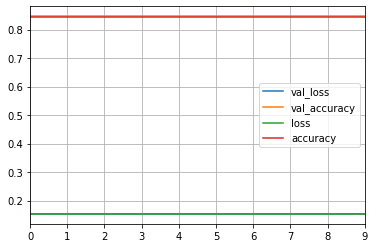

In [74]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim()
plt.show()

In [75]:
testing_acc_lstm =model2.evaluate(X_test,y_test)

1320/1320 [==============================] - 0s 124us/step


In [77]:
print("Loss and Accuracy of testing data =",testing_acc_lstm)

Loss and Accuracy of testing data = [0.15303078368978565, 0.846969723701477]


* Accuracy of testing data using lstm is low as compare to dense neural network before. 
* Accuracy- model2 < model
* Loss - model2 > model 

### Final conclusion

* Our model work fine on dense neural network as compare to simple rnn and lstm 